# Craft Beer Final Notebook

In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

from acquire import beer_df, beer_states

In [2]:
# getting the beer data from my acquire file
df = beer_df()
df.head() # check_yo_head

,number,abv,ibu,id,beer,beer_style,brewery_id,ounces,brewery,city,state
0,0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0,NorthGate Brewing,Minneapolis,MN
1,1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0,Against the Grain Brewery,Louisville,KY
2,2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0,Jack's Abby Craft Lagers,Framingham,MA
3,3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0,Mike Hess Brewing Company,San Diego,CA
4,4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0,Fort Point Beer Company,San Francisco,CA


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 558 entries, 0 to 557
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   number      558 non-null    int64  
 1   abv         542 non-null    float64
 2   ibu         286 non-null    float64
 3   id          558 non-null    int64  
 4   beer        558 non-null    object 
 5   beer_style  558 non-null    object 
 6   brewery_id  558 non-null    int64  
 7   ounces      558 non-null    float64
 8   brewery     558 non-null    object 
 9   city        558 non-null    object 
 10  state       558 non-null    object 
dtypes: float64(3), int64(3), object(5)
memory usage: 52.3+ KB


In [14]:
df.describe()

,number,abv,ibu,id,brewery_id,ounces
count,558.000000,542.000000,286.000000,558.000000,558.000000,558.000000
mean,278.500000,0.060825,43.027972,1519.008961,219.494624,13.391398
std,161.224998,0.013700,26.139556,788.197909,169.346041,1.964075
min,0.000000,0.032000,4.000000,9.000000,1.000000,8.400000
25%,139.250000,0.050250,22.000000,873.750000,60.000000,12.000000
50%,278.500000,0.058500,37.000000,1568.500000,187.000000,12.000000
75%,417.750000,0.068000,60.000000,2217.750000,368.000000,16.000000
max,557.000000,0.125000,138.000000,2686.000000,556.000000,24.000000


(-0.5, 799.5, 599.5, -0.5)

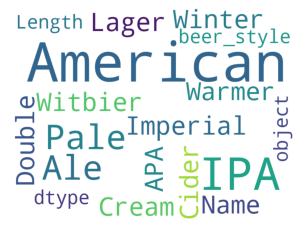

In [16]:
# making a wordcloud of the beer styles
from wordcloud import WordCloud

beers = df.beer_style

img = WordCloud(background_color='white', width=800, height=600).generate(str(beers))
plt.imshow(img)
plt.axis('off')

<AxesSubplot:xlabel='abv', ylabel='Density'>

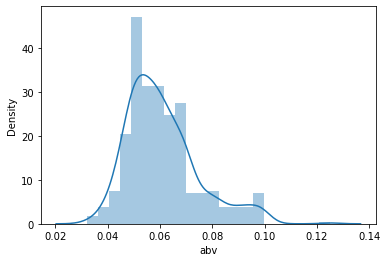

In [7]:
# plotting the alcohol by volume
sns.distplot(df.abv)

In [5]:
state_df = df['state'].value_counts().rename_axis('states').reset_index(name='breweries')
state_df.head()

,states,breweries
0,CO,47
1,CA,39
2,MI,32
3,OR,29
4,TX,28
